<a href="https://colab.research.google.com/github/manoj1995madushanka/couseraTensorflow/blob/master/A_Computer_Vision_Example_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

emport what we need

In [4]:
import tensorflow as tf
print(tf.__version__)

1.13.1


import Fashion MNIST data from keras directly

In [0]:
mnist = tf.keras.datasets.fashion_mnist

mnist contain two sets of data then loadthat two sets

In [6]:
(training_images, training_labels),(test_images,test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


then try to print out training image

training label =  9
training image =  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0 

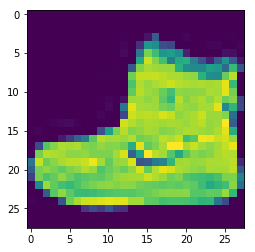

In [7]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print("training label = ",training_labels[0])
print("training image = ",training_images[0])

each value has a range 0-255 for train neural network we are easy to convert that range to 0-1 in python we can do htis without looing ( process called normalizing )

In [0]:
training_images = training_images / 255.0
test_images = test_images / 255.0

now we define model

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

**Sequential:** That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding

now we compile our model with optimizer and loss function

In [10]:
model.compile(optimizer = tf.train.AdamOptimizer(),loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4929 - acc: 0.8259
Epoch 2/50
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3749 - acc: 0.8653
Epoch 3/50
60000/60000 [==============================] - 5s 92us/sample - loss: 0.3373 - acc: 0.8774
Epoch 4/50
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3114 - acc: 0.8852
Epoch 5/50
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2944 - acc: 0.8911
Epoch 6/50
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2823 - acc: 0.8953
Epoch 7/50
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2679 - acc: 0.9000
Epoch 8/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2572 - acc: 0.9043
Epoch 9/50
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2480 - acc: 0.9071
Epoch 10/50
60000/60000 [==============================] - 6s 105us/sample

now we check accuracy of this using unseen data set caled test data

In [12]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.4905 - acc: 0.8856


[0.49049932687580583, 0.8856]

**exercise 1**

creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. 

In [13]:
classifications = model.predict(test_images)
print(classifications[0])

[1.8048107e-16 3.0406011e-22 3.4401390e-19 2.4912608e-18 7.6452452e-20
 2.1561039e-08 1.2729255e-19 1.7319479e-06 3.2290604e-20 9.9999821e-01]


In [14]:
print(test_labels[0])

9


this number 9 represent the probability that this item is each of the 10 classes

In [15]:
print(test_labels)

[9 2 1 ... 8 1 5]


Let's now look at the layers in my model. Experiment with different values for the dense layer with 512 neurons. 

In [18]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels),(test_images,test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(1024,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels,epochs=5)
model.evaluate(test_images,test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.13.1
Epoch 1/5
60000/60000 [==============================] - 32s 529us/sample - loss: 0.1851
Epoch 2/5
60000/60000 [==============================] - 31s 522us/sample - loss: 0.0746
Epoch 3/5
60000/60000 [==============================] - 31s 520us/sample - loss: 0.0495
Epoch 4/5
60000/60000 [==============================] - 31s 521us/sample - loss: 0.0347
Epoch 5/5
10000/10000 [==============================] - 1s 107us/sample - loss: 0.0695
[6.2198365e-11 4.0087897e-10 1.0570869e-08 4.5740384e-05 1.6761291e-15
 1.1117038e-08 7.3868896e-14 9.9995410e-01 9.7186948e-08 8.9893133e-09]
7


we increase neurons in above code that make more training time but it is more accuarate

happen if you remove the Flatten() layer let's try

In [19]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Dense(64,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy')
model.fit(training_images,training_labels,epochs=5)
model.evaluate(test_images,test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.13.1
Epoch 1/5


InvalidArgumentError: ignored

its something error about shape of our data

 It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

In [20]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.13.1
Epoch 1/5


InvalidArgumentError: ignored

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [21]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.13.1
Epoch 1/5
60000/60000 [==============================] - 17s 280us/sample - loss: 13.8409
Epoch 2/5
60000/60000 [==============================] - 16s 261us/sample - loss: 13.4204
Epoch 3/5
60000/60000 [==============================] - 15s 258us/sample - loss: 13.3983
Epoch 4/5
60000/60000 [==============================] - 16s 262us/sample - loss: 12.4335
Epoch 5/5
10000/10000 [==============================] - 1s 71us/sample - loss: 11.9677
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
7


optimising process

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...



In [24]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

1.13.1
Epoch 1/5
60000/60000 [==============================] - 17s 276us/sample - loss: 0.4755
Epoch 2/5
59840/60000 [============================>.] - ETA: 0s - loss: 0.3569
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 17s 280us/sample - loss: 0.3569


now its done by 2 epoches lets try accuracy using test data

In [25]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 92us/sample - loss: 0.3723


0.3722762570619583